# Calculating the price of a stock option using BSM Formula:

$$
d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

$$
d_2 = d_1 - s \cdot \sqrt{t} = \frac{\ln(\frac{S}{K}) + (r - \frac{stdev^2}{2})t}{s \cdot \sqrt{t}}
$$

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

In [2]:
def d1(s , k , r , stdev , T):
    return (np.log(s/k) + (r + stdev ** 2/2) * T) / (stdev * np.sqrt(T))

def d2(s , k , r , stdev , T):
    return (np.log(s/k) + (r - stdev ** 2 / 2) * T) / (stdev * np.sqrt(T))

In [3]:
norm.cdf(0)

0.5

In [4]:
norm.cdf(0.25)

0.5987063256829237

In [5]:
norm.cdf(0.75)

0.7733726476231317

In [6]:
norm.cdf(9)

1.0

$$
\textbf{C} = SN(d_1) - Ke^{-rt}N(d_2) 
$$

In [7]:
def BSM(S, K, r, stdev, T):
        return (S * norm.cdf(d1(S, K, r, stdev, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev, T)))

In [8]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2017-03-21')['Adj Close']

In [9]:
s = data.iloc[-1]
s

PG    117.25
Name: 2019-08-13 00:00:00, dtype: float64

In [10]:
log_returns =  np.log(1 + data.pct_change())

In [11]:
stdev = log_returns.std() * 250 **0.5
stdev

PG    0.16015
dtype: float64

In [12]:
r = 0.025
k = 110.0
T = 1

In [13]:
d1 (s, k, r, stdev, T)

PG    0.634732
dtype: float64

In [14]:
d2 (s, k, r, stdev, T)

PG    0.474582
dtype: float64

In [15]:
BSM(s, k, r, stdev, T)

PG    13.219658
Name: 2019-08-13 00:00:00, dtype: float64

# MC - Euler Discretization

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [16]:
import matplotlib.pyplot as plt  
%matplotlib inline

In [17]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start = '2007-01-01', end='2017-01-21')['Adj Close']

In [18]:
log_returns = np.log( 1 + data.pct_change())

In [19]:
r = 0.025

In [20]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.177352
dtype: float64

In [21]:
type(stdev)

pandas.core.series.Series

In [22]:
stdev = stdev.values
stdev

array([0.17735228])

In [23]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

iterations = 10000  

In [24]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [25]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [26]:
S

array([[ 80.81494904,  80.81494904,  80.81494904, ...,  80.81494904,
         80.81494904,  80.81494904],
       [ 79.85531943,  81.77831493,  80.77210152, ...,  80.90955659,
         80.32228016,  81.44392668],
       [ 79.97187736,  82.76776672,  80.34021402, ...,  80.83815653,
         81.88335184,  81.63175872],
       ...,
       [ 90.4288926 ,  76.04540469, 106.96839516, ...,  65.91663314,
         89.79525987, 117.73529671],
       [ 89.01430209,  76.12554864, 110.15168295, ...,  66.41906429,
         90.91547529, 120.13542861],
       [ 88.3323869 ,  76.16679545, 110.75632897, ...,  66.48307298,
         91.56030193, 121.41328448]])

In [27]:
S.shape

(251, 10000)

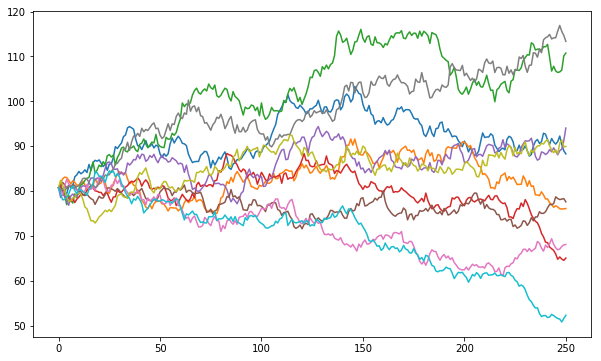

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

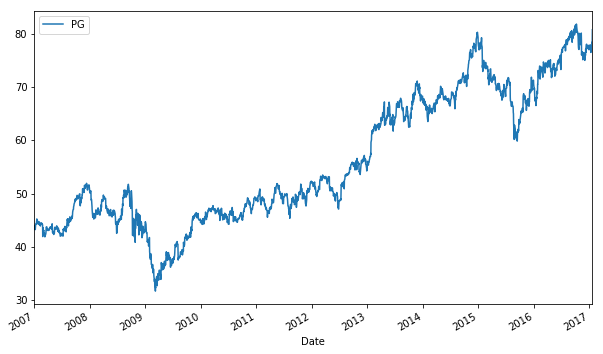

In [29]:
data.plot(figsize=(10, 6));

In [30]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.177352
dtype: float64

In [31]:
type(stdev)

pandas.core.series.Series

In [32]:
stdev = stdev.values
stdev

array([0.17735228])

In [33]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [34]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])


In [35]:
S

array([[ 80.81494904,  80.81494904,  80.81494904, ...,  80.81494904,
         80.81494904,  80.81494904],
       [ 80.79440853,  81.24796252,  80.29859546, ...,  80.54681472,
         80.58980084,  82.14915145],
       [ 81.11727759,  82.47082823,  80.19225648, ...,  80.15702074,
         81.46940035,  81.42929499],
       ...,
       [ 84.70592614, 103.74642148,  80.19562695, ...,  79.86904728,
         64.59352475,  95.01281448],
       [ 85.35333676, 103.70186967,  78.99073851, ...,  79.4819623 ,
         65.04973668,  96.26663537],
       [ 86.3957872 , 104.3120445 ,  80.06306304, ...,  80.05598344,
         63.99570178,  96.37834166]])

In [36]:
S.shape

(251, 10000)

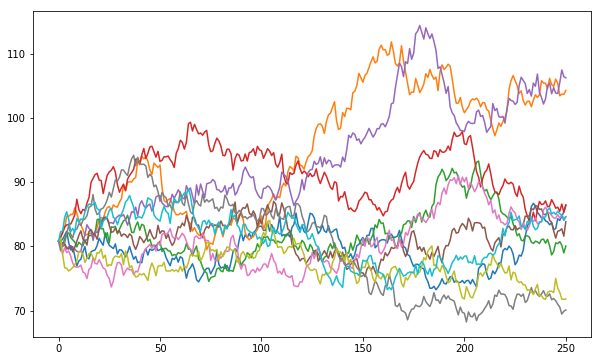

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [38]:
p = np.maximum(S[-1] - 110, 0)

p

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
p.shape

(10000,)

In [40]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.42295185151816733